In [1]:
import pandas as pd
df = pd.read_csv("ass1.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Load the dataset and display basic information
df = pd.read_csv("ass1.csv")
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
# Task 2: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  


if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

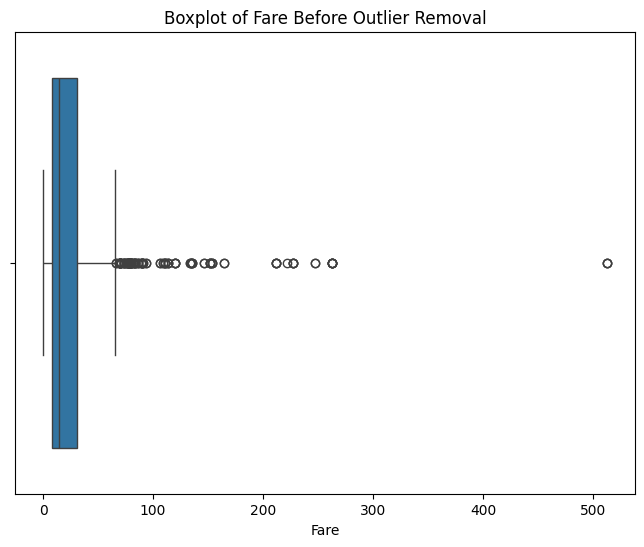

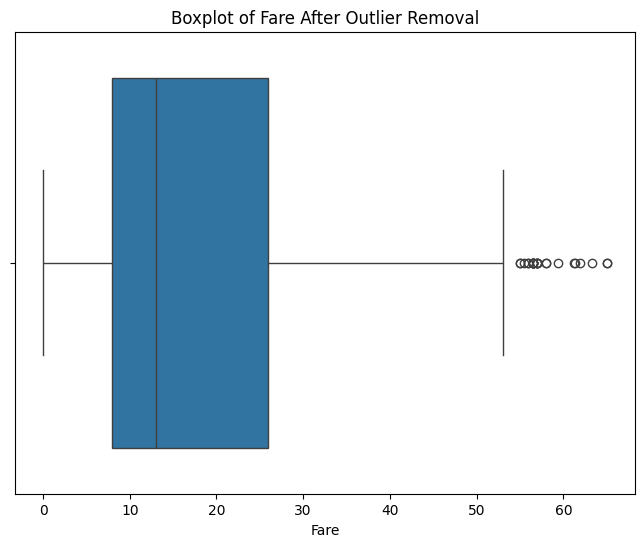

In [6]:
# Task 3: Detect and remove outliers using boxplots and IQR method
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare Before Outlier Removal")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare After Outlier Removal")
plt.show()

In [7]:
# Task 4: Feature Engineering (Ensure FamilySize Exists)
df = df.copy()  # Ensure it's not a slice

if 'SibSp' in df.columns and 'Parch' in df.columns:  
    df.loc[:, 'FamilySize'] = df['SibSp'] + df['Parch'] + 1
else:
    print("Error: 'SibSp' or 'Parch' column is missing!")

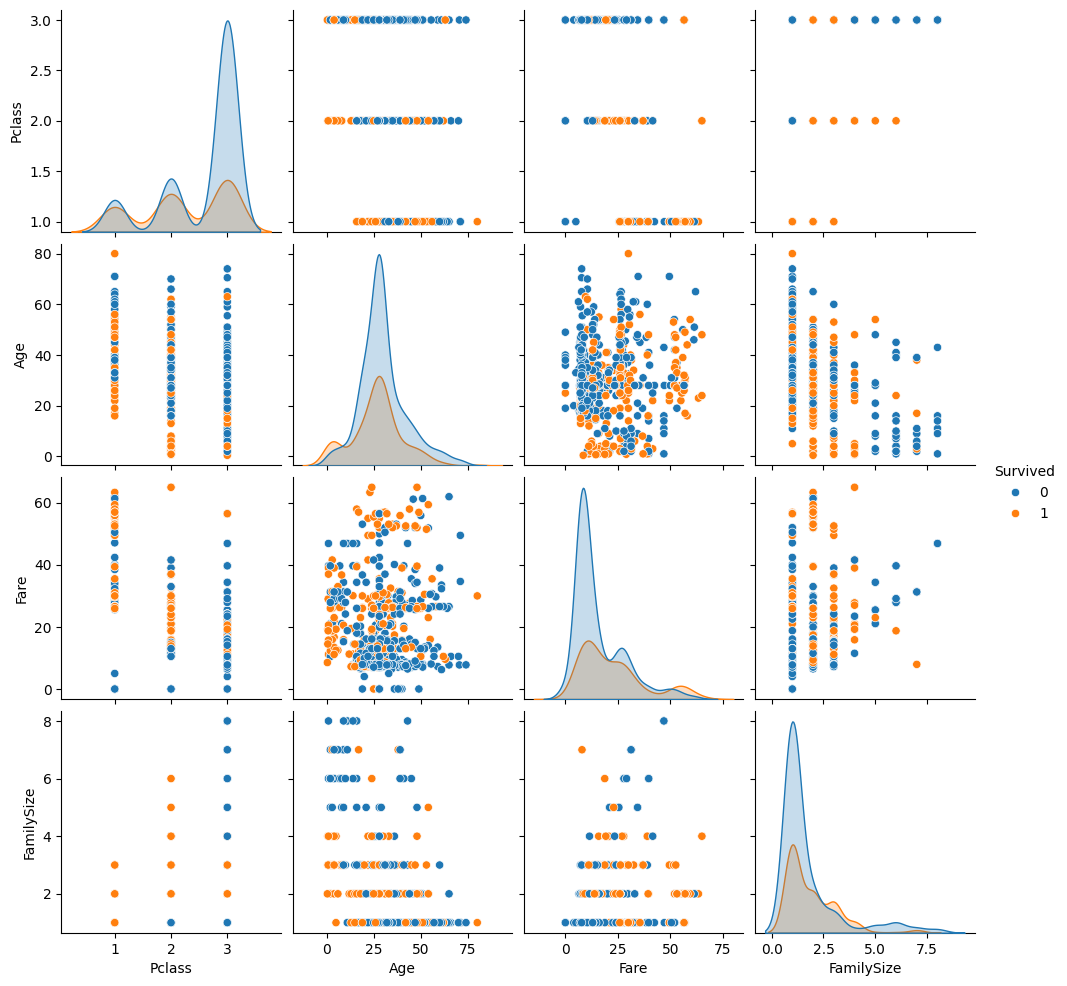

In [8]:
# Task 5: Visualizations
numeric_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']  # Exclude 'AgeGroup'
sns.pairplot(df[numeric_cols], hue='Survived')
plt.show()

Feature Correlation with Survival:
Survived       1.000000
Fare           0.234422
Parch          0.098575
FamilySize     0.052674
SibSp         -0.003156
PassengerId   -0.024438
Age           -0.118009
Pclass        -0.238532
Name: Survived, dtype: float64


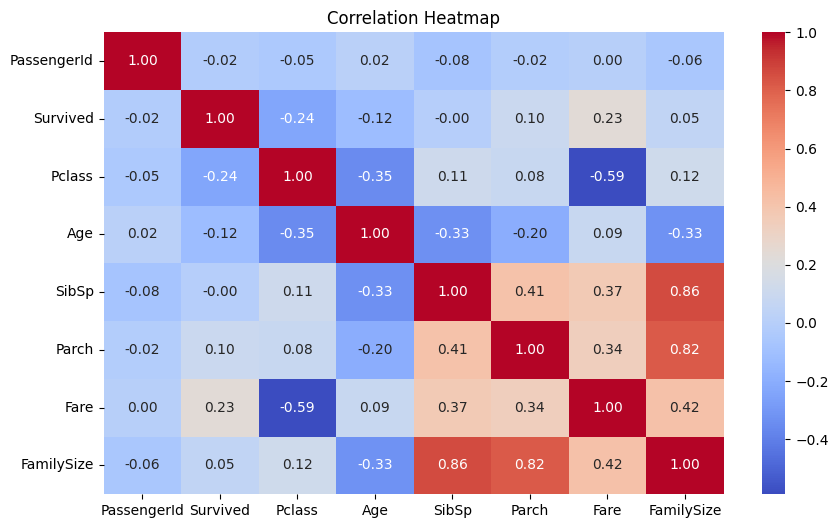

In [9]:
# Task 6: Correlation Analysis
df_corr = df.select_dtypes(include=['number'])  # Keep only numerical columns

correlation_matrix = df_corr.corr()  # Compute correlation
print("Feature Correlation with Survival:")
print(correlation_matrix["Survived"].sort_values(ascending=False))

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd

file_path = "ass1.csv"  # Change this to your CSV file path
df = pd.read_csv(file_path)
print("Dataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Option 1: Drop missing values
df_cleaned = df.dropna()
print("\nAfter dropping missing values:")
print(df_cleaned.isnull().sum())

# Option 2: Impute missing values with mean (for numerical columns)
df_imputed = df.fillna(df.mean(numeric_only=True))
print("\nAfter imputing missing values:")
print(df_imputed.isnull().sum())

# Option 3: Impute missing values with mode (for categorical columns)
df_imputed = df.fillna(df.mode().iloc[0])
print("\nAfter imputing missing values:")
print(df_imputed.isnull().sum())

#or
num_cols = df.select_dtypes(['float64']).columns
cat_cols = df.select_dtypes(['object']).columns
mean_val=df[num_cols].mean()
mode_val=df[cat_cols].mode().iloc[0]

df[num_cols]=df[num_cols].fillna(mean_val)
df[cat_cols]=df[cat_cols].fillna(mode_val)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "data.csv"  # Change this to your CSV file path
df = pd.read_csv(file_path)

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Fill missing numerical values using mean/median
df.fillna(df.mean(numeric_only=True), inplace=True)  # Use df.median(numeric_only=True) if preferred

# Fill missing categorical values using mode or a placeholder
df.fillna({col: df[col].mode()[0] if df[col].dtype == 'O' else 'Unknown' for col in df.columns}, inplace=True)

# Drop irrelevant or redundant columns
df.drop(columns=['ID', 'Unnamed: 0'], errors='ignore', inplace=True)
# Drop irrelevant or redundant columns
#df.drop(['ID', 'Unnamed: 0'], axis=1, errors='ignore', inplace=True)


# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save the cleaned dataset to a new CSV file
cleaned_file_path = "cleaned_data.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")
